<a href="https://colab.research.google.com/github/sonchangwoo95/LSTM-SS-stoc/blob/main/LSTM_SS_%ED%91%9C%EC%A4%80%ED%99%94Test_%EC%8B%A4%EC%A0%9C%EA%B0%92%ED%99%98%EC%82%B0_After5day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [ ]:
data = pd.read_csv('sample_data/005930.KS_filter.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-01,25980,26180,25420,25580,22242.25781,13557800
1,2016-04-04,25580,26100,25580,26100,22694.39844,9402300
2,2016-04-05,25980,25980,25200,25200,21911.83789,11815950
3,2016-04-06,25380,25820,25360,25700,22346.59375,9211700
4,2016-04-07,26000,26000,25160,25380,22068.34766,12939750


In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
mid_prices

array([25800., 25840., 25590., ..., 81800., 82050., 82500.])

In [ ]:
seq_len = 50
sequence_length = seq_len + 5 # @@@

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])   # 슬라이싱_자르기. (: 기준) 앞은 0부터 포함해서 사용, 뒤는 포함 안함
                                                                # append : 리스트 뒤에 요소를 추가한다. (cf, expend : 리스트에 리스트를 뒤에 추가)

result

[array([25800., 25840., 25590., 25590., 25580., 25090., 25170., 25470.,
        25910., 26000., 25970., 25790., 25820., 25890., 25710., 25560.,
        25880., 25860., 25610., 25090., 25070., 25260., 25520., 25850.,
        25880., 25860., 25670., 25320., 25100., 25140., 25260., 25430.,
        25490., 25550., 25570., 25720., 25980., 25740., 25710., 25680.,
        26360., 27180., 27430., 27820., 28080., 28360., 28290., 27580.,
        27550., 27990., 28120., 28450., 28740., 28750., 28810.]),
 array([25840., 25590., 25590., 25580., 25090., 25170., 25470., 25910.,
        26000., 25970., 25790., 25820., 25890., 25710., 25560., 25880.,
        25860., 25610., 25090., 25070., 25260., 25520., 25850., 25880.,
        25860., 25670., 25320., 25100., 25140., 25260., 25430., 25490.,
        25550., 25570., 25720., 25980., 25740., 25710., 25680., 26360.,
        27180., 27430., 27820., 28080., 28360., 28290., 27580., 27550.,
        27990., 28120., 28450., 28740., 28750., 28810., 28720.]),
 arr

In [ ]:
# result.shape 형태 알려고 하니 에러 발생, [array([ , , , ])]의 형태 ==> array([[ , , , ]])로 변경필요
result.shape

AttributeError: ignored

In [ ]:
# array([[ , , , ]])로 변경
result = np.array(result)
result

array([[25800., 25840., 25590., ..., 28740., 28750., 28810.],
       [25840., 25590., 25590., ..., 28750., 28810., 28720.],
       [25590., 25590., 25580., ..., 28810., 28720., 28050.],
       ...,
       [83450., 86500., 93150., ..., 81450., 81300., 81350.],
       [86500., 93150., 89600., ..., 81300., 81350., 81800.],
       [93150., 89600., 90150., ..., 81350., 81800., 82050.]])

In [ ]:
# txt로 저장 (구분은 공백으로)
np.savetxt('myDF.txt', result, delimiter=" ")

# 참고 : csv 읽어오기
# data = pd.read_csv('sample_data/005930.KS_filter.csv')

In [ ]:
result_normal = []
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]       # (중요) 리스트 컴프리헨션 : 기존 리스트를 이용하여 새로운 리스트를 만든다 
    normalized_data.append(normalized_window)                                       # Normalize, x' = (xi/x0 - 1) : 0을 기준으로 +/- 로 분포시킴 (Z값 변환하는것은?)
                                                                                    # float(p) : 캐스팅, 소숫점 형태 변환
result_normal = np.array(normalized_data)

result_normal

# # txt로 저장 (구분은 공백으로)
# np.savetxt('myDF_normal.txt', result_normal, delimiter=" ")

array([[ 0.        ,  0.00155039, -0.00813953, ...,  0.11395349,
         0.11434109,  0.11666667],
       [ 0.        , -0.00967492, -0.00967492, ...,  0.1126161 ,
         0.11493808,  0.11145511],
       [ 0.        ,  0.        , -0.00039078, ...,  0.1258304 ,
         0.1223134 ,  0.0961313 ],
       ...,
       [ 0.        ,  0.03654883,  0.11623727, ..., -0.02396645,
        -0.02576393, -0.02516477],
       [ 0.        ,  0.07687861,  0.03583815, ..., -0.06011561,
        -0.05953757, -0.05433526],
       [ 0.        , -0.03811057, -0.03220612, ..., -0.1266774 ,
        -0.12184648, -0.11916264]])

In [ ]:
result_normal.shape

(1171, 55)

In [ ]:
result_normal

array([[ 0.        ,  0.00155039, -0.00813953, ...,  0.11395349,
         0.11434109,  0.11666667],
       [ 0.        , -0.00967492, -0.00967492, ...,  0.1126161 ,
         0.11493808,  0.11145511],
       [ 0.        ,  0.        , -0.00039078, ...,  0.1258304 ,
         0.1223134 ,  0.0961313 ],
       ...,
       [ 0.        ,  0.03654883,  0.11623727, ..., -0.02396645,
        -0.02576393, -0.02516477],
       [ 0.        ,  0.07687861,  0.03583815, ..., -0.06011561,
        -0.05953757, -0.05433526],
       [ 0.        , -0.03811057, -0.03220612, ..., -0.1266774 ,
        -0.12184648, -0.11916264]])

In [ ]:
# split train and test data
# row = int(round(result_normal.shape[0] * 0.9))
row = int(round(result_normal.shape[0] * 0.8))
train = result_normal[:row, :]
np.random.shuffle(train)                            # 섞기

# 선언
#y_real_test =[]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))          # Array 3차원 변환
y_train = train[:, -1]

x_test = result_normal[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_normal[row:, -1]

# Normalization 하지 않은 실제 y_real_test
y_real_test = result[row:, -1]
# y_real_test.shape

# x_test용 Array DB에서 세로축 맨 앞의 값만 추출
x_base_test = result[row:, 1] 
# array([ , , , ]) ==> array([],[],[]) 변환 (@ 중요)
# x_base_test = np.reshape(x_base_test,(row,1)) <== row 쓰면, Error 발생
# x_base_test = np.reshape(x_base_test,(117,1)) Error 안남
x_base_test = np.reshape(x_base_test,(x_base_test.shape[0],1)) # Error 안남

x_train.shape, x_test.shape, y_train.shape, x_base_test.shape, x_base_test

# # txt로 저장 (구분은 공백으로)
# np.savetxt('x_train.txt', x_train, delimiter=" ")       # 3D로 표현되네.... 그래서 에러남
# np.savetxt('y_train.txt', y_train, delimiter=" ")
# np.savetxt('x_test.txt', x_test, delimiter=" ")
# np.savetxt('y_test.txt', y_test, delimiter=" ")
# np.savetxt('y_real_test.txt', y_real_test, delimiter=" ")

((937, 54, 1), (234, 54, 1), (937,), (234, 1), array([[57900.],
        [59550.],
        [60400.],
        [60450.],
        [59450.],
        [60200.],
        [60200.],
        [61050.],
        [61050.],
        [61600.],
        [60300.],
        [59900.],
        [60450.],
        [59150.],
        [57450.],
        [57100.],
        [56500.],
        [56200.],
        [54850.],
        [54550.],
        [56000.],
        [56100.],
        [57350.],
        [56700.],
        [56500.],
        [54300.],
        [53200.],
        [52100.],
        [49225.],
        [49850.],
        [48175.],
        [46975.],
        [44475.],
        [44525.],
        [42975.],
        [45000.],
        [48375.],
        [48500.],
        [48275.],
        [47450.],
        [47825.],
        [46850.],
        [46100.],
        [47075.],
        [48025.],
        [49600.],
        [49175.],
        [49250.],
        [48950.],
        [48600.],
        [48750.],
        [48950.],
        [51150.],


In [ ]:
x_train

array([[[ 0.        ],
        [ 0.01639344],
        [-0.00351288],
        ...,
        [-0.08665105],
        [-0.0991413 ],
        [-0.08079625]],

       [[ 0.        ],
        [-0.00240732],
        [ 0.01540684],
        ...,
        [ 0.09051517],
        [ 0.09966298],
        [ 0.11844006]],

       [[ 0.        ],
        [-0.01237113],
        [-0.02525773],
        ...,
        [ 0.09175258],
        [ 0.08195876],
        [ 0.07938144]],

       ...,

       [[ 0.        ],
        [ 0.0250298 ],
        [ 0.03337306],
        ...,
        [-0.0727056 ],
        [-0.06555423],
        [-0.05601907]],

       [[ 0.        ],
        [-0.00185529],
        [ 0.01360544],
        ...,
        [ 0.13234385],
        [ 0.1292517 ],
        [ 0.11502783]],

       [[ 0.        ],
        [ 0.0004158 ],
        [ 0.01663202],
        ...,
        [ 0.04407484],
        [ 0.04781705],
        [ 0.04615385]]])

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
94/94 [==============================] - 8s 51ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 2/20
94/94 [==============================] - 4s 42ms/step - loss: 9.7441e-04 - val_loss: 0.0012
Epoch 3/20
94/94 [==============================] - 4s 42ms/step - loss: 7.4035e-04 - val_loss: 8.5439e-04
Epoch 4/20
94/94 [==============================] - 4s 41ms/step - loss: 5.7724e-04 - val_loss: 5.8036e-04
Epoch 5/20
94/94 [==============================] - 4s 41ms/step - loss: 4.0258e-04 - val_loss: 5.3113e-04
Epoch 6/20
94/94 [==============================] - 4s 42ms/step - loss: 3.7460e-04 - val_loss: 4.2014e-04
Epoch 7/20
94/94 [==============================] - 4s 42ms/step - loss: 2.8624e-04 - val_loss: 7.3289e-04
Epoch 8/20
94/94 [==============================] - 4s 42ms/step - loss: 3.1516e-04 - val_loss: 3.7559e-04
Epoch 9/20
94/94 [==============================] - 4s 43ms/step - loss: 2.8502e-04 - val_loss: 6.5508e-04
Epoch 10/20
94/94 [==============================

In [ ]:
pred = model.predict(x_test)

In [ ]:
y_real_test

array([50700., 49200., 49175., 49900., 49375., 49550., 49700., 50050.,
       48800., 48850., 49000., 49075., 48775., 48025., 47875., 47875.,
       48075., 48350., 50100., 50000., 50125., 49200., 48675., 49025.,
       49400., 50550., 50200., 50900., 51150., 53350., 55800., 54950.,
       55600., 55450., 55400., 54150., 52150., 50950., 51350., 52100.,
       51950., 52250., 52200., 51950., 52750., 52450., 53050., 52600.,
       53350., 53000., 52500., 53150., 54400., 54650., 53400., 53200.,
       52750., 53450., 53500., 54650., 54300., 54400., 54400., 55100.,
       55100., 54250., 54050., 55000., 57600., 59500., 59550., 58650.,
       57300., 57550., 56900., 57750., 57750., 57900., 58650., 58350.,
       58800., 58050., 58950., 58500., 56450., 56350., 56000., 56450.,
       56100., 55950., 55850., 55050., 54450., 54600., 56100., 55450.,
       56550., 57950., 58550., 59550., 58800., 60350., 60750., 60950.,
       60050., 59500., 59500., 58750., 58100., 58100., 57950., 58350.,
      

In [ ]:
y_real_test.shape

(234,)

In [ ]:
# array([ , , , ]) ==> array([],[],[]) 변환
#y_real_test = np.reshape(y_real_test,(117,1))
y_real_test = np.reshape(y_real_test,(y_real_test.shape[0],1))

y_real_test

array([[50700.],
       [49200.],
       [49175.],
       [49900.],
       [49375.],
       [49550.],
       [49700.],
       [50050.],
       [48800.],
       [48850.],
       [49000.],
       [49075.],
       [48775.],
       [48025.],
       [47875.],
       [47875.],
       [48075.],
       [48350.],
       [50100.],
       [50000.],
       [50125.],
       [49200.],
       [48675.],
       [49025.],
       [49400.],
       [50550.],
       [50200.],
       [50900.],
       [51150.],
       [53350.],
       [55800.],
       [54950.],
       [55600.],
       [55450.],
       [55400.],
       [54150.],
       [52150.],
       [50950.],
       [51350.],
       [52100.],
       [51950.],
       [52250.],
       [52200.],
       [51950.],
       [52750.],
       [52450.],
       [53050.],
       [52600.],
       [53350.],
       [53000.],
       [52500.],
       [53150.],
       [54400.],
       [54650.],
       [53400.],
       [53200.],
       [52750.],
       [53450.],
       [53500.

In [ ]:
y_real_test.shape

(234, 1)

In [ ]:
pred.shape

(234, 1)

In [ ]:
# 예측값을 원래단위로 환산
# normalized_data = []
# for window in result:
#     normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
#     # normalized_window = [(float(p)) for p in window]
#     normalized_data.append(normalized_window)

expect = []

# for i in y_real_test:
#     expect_window = (pred[i] + 1) * y_real_test[i]
#     expect.append(expect_winodw)

# expect = [ (pred[i] + 1) * y_real_test[i] for i in window]
#expect.append(expect_window)

expect = (pred + 1) * x_base_test

expect

array([[52616.77325964],
       [51591.79885983],
       [48858.60035419],
       [48455.86842299],
       [48671.66985869],
       [49375.70786476],
       [48957.99478292],
       [49850.0801146 ],
       [49528.41913104],
       [48356.1191082 ],
       [47113.60892057],
       [48140.45001268],
       [48979.65838909],
       [47076.56405866],
       [45891.72725379],
       [46959.06573534],
       [46849.2358923 ],
       [47356.68190718],
       [46752.8390795 ],
       [49742.87931323],
       [50864.05801773],
       [49634.67945457],
       [49486.91954613],
       [47372.16743231],
       [48380.79151511],
       [47105.01735806],
       [49350.09078979],
       [48667.74202585],
       [47770.89045048],
       [51455.78103065],
       [51664.08049464],
       [54630.3732574 ],
       [51385.38282216],
       [55281.56754076],
       [53034.40684676],
       [57529.46197987],
       [57468.58710051],
       [51421.68194056],
       [50081.20470345],
       [50309.72436666],


In [ ]:
expect

array([[63741.55468941],
       [61633.97731781],
       [60812.92290688],
       [60200.48971176],
       [58646.52317762],
       [60187.70833015],
       [59216.03947878],
       [61592.07220078],
       [61234.12313461],
       [59922.19042778],
       [61244.66776848],
       [60348.53899479],
       [60505.80034256],
       [57776.91688538],
       [59602.43182778],
       [57026.93243027],
       [55679.58297729],
       [58095.85797787],
       [58442.96970367],
       [60294.28071976],
       [60157.36222267],
       [60255.13062477],
       [60012.71185875],
       [60857.33377934],
       [59579.0459156 ],
       [63268.90909672],
       [68510.87329388],
       [65336.01307869],
       [67084.89840031],
       [65574.72169399],
       [65420.04032135],
       [68476.4957428 ],
       [68507.38942623],
       [69108.65135193],
       [67579.23996449],
       [68287.1673584 ],
       [67601.82228088],
       [66774.14075136],
       [69685.75716019],
       [69684.67065096],


# 실제값으로 추적되는 그래프를 **표현**

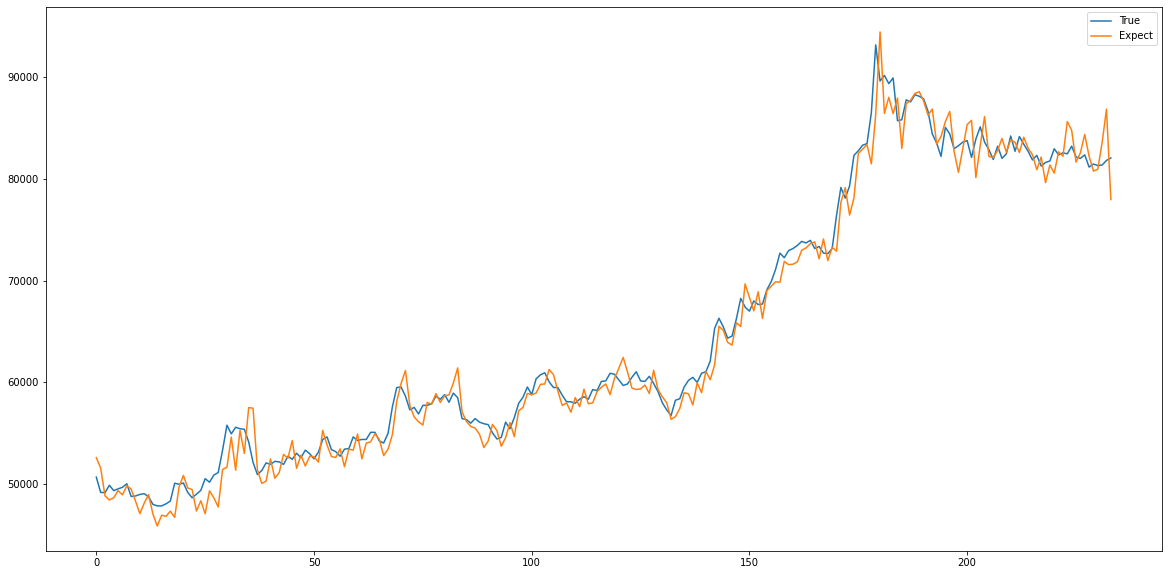

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)

# 표준화 이전값으로 변경을해서 그래프 표시
ax.plot(y_real_test, label='True')
ax.plot(expect, label='Expect')

ax.legend()
plt.show()

Nomalized 시켜서 변형된 값으로 추정하는 그래프

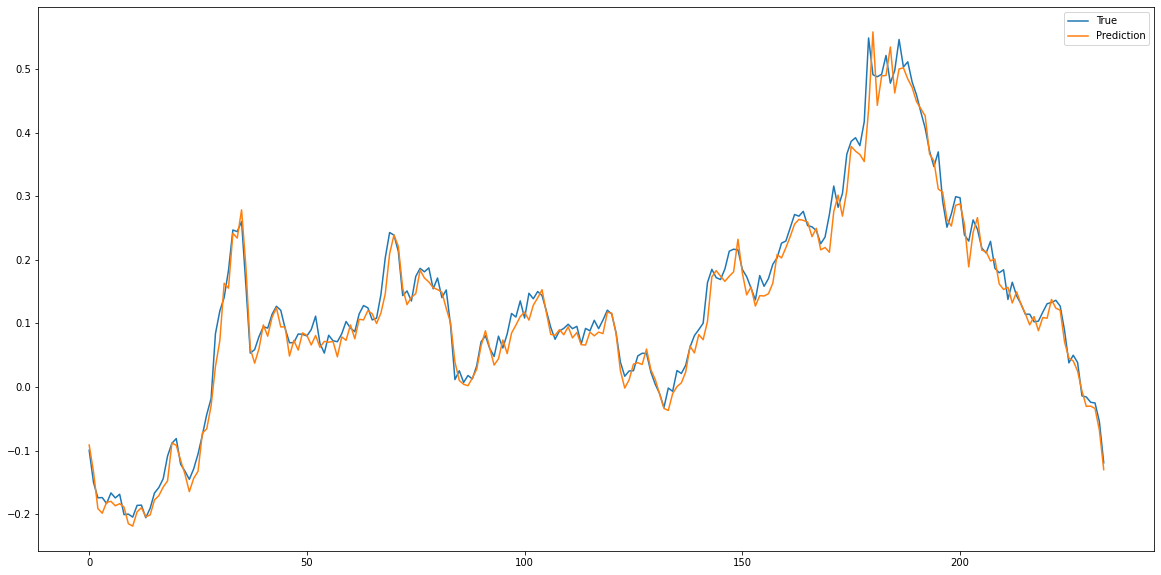

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
# Normalization으로 변환했을 예측값
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')

ax.legend()
plt.show()

1 코드 깔끔하게 정리하기\
2 코드와 표로 내용 설명

3 하루 이후의 주식값을 예측하지 않고, 5일 후의 주식값을 예측하는 PGM 만들기